In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
#from ridgeplot import ridgeplot
import joypy

# Generare de date

Presupunem ca vrem sa modelam relatia intre __venit__ si __consum__ pentru o populatie anume, presupunem o populatie de 100 000 persoane. 
Variabila independenta este __venitul__, variabila stiuta
1. Generam date aleator despre venit.
2. Simulam o relatie intre venit si consum la care adaugam o perturbatie (normal distribuita)

Generarea de venituri aleatoare

In [2]:
#define the dimensions and parameters for the pseudo random generation

n_observations = 100000

#normal distributed scenario
mean_income = 10000
std_income = 3000
incomes = np.random.normal(loc=mean_income, scale=std_income,size=n_observations)

#uniform distributed
# low_param = 2000
# high_param = 25000
# incomes = np.random.uniform(low=low_param, high=high_param,size=n_observations)

df = pd.DataFrame({'income':incomes})
df


,income
0,12044.094937
1,11780.856916
2,17043.645373
3,14714.734118
4,4496.869556
...,...
99995,17018.153384
99996,16551.972869
99997,15350.863272
99998,19882.076507


c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


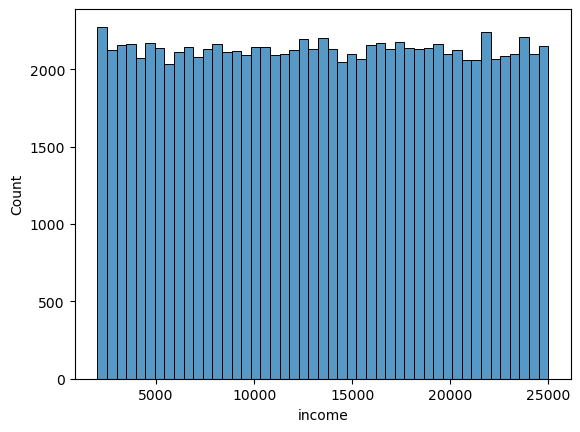

In [3]:
hist_x = sns.histplot(data=df, x='income')

Definim o relatie intre __venit__ si __consum__ (este o functie speciala pentru asta in sklearn: make_regression, dar vom face manual).

Va fi de tipul 

Y = $\beta_0$ + $\beta_1 X_1$ + $\epsilon$


In [4]:
b0 = 1000
b1 = 0.6
error_mean = 0
error_std = 500

def generate_consumtion(x: float, beta0: float, beta1: float, error_mean: float, error_std: float)->float:
    y = beta0 + beta1*x + np.random.normal(loc=error_mean, scale=error_std)
    return y


In [5]:
# append add the simulated consumption

df['consumption'] = df['income'].apply(generate_consumtion, args=(b0, b1, error_mean, error_std))
df

,income,consumption
0,12044.094937,8855.943697
1,11780.856916,7701.705050
2,17043.645373,10656.947052
3,14714.734118,9430.465192
4,4496.869556,3150.605881
...,...,...
99995,17018.153384,10978.285341
99996,16551.972869,10779.738615
99997,15350.863272,10708.141577
99998,19882.076507,13131.143162


Presupunem ca aceasta este populatia noastra, 100 000 persoane

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


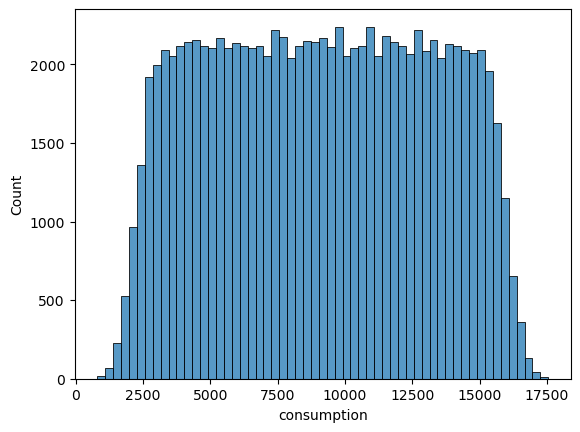

In [6]:
hist_y = sns.histplot(data=df, x='consumption')

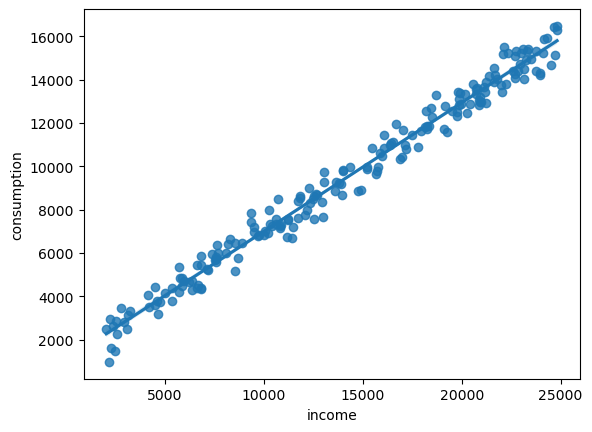

In [7]:
relationship_plot = sns.regplot(data=df.sample(200), x='income',y='consumption')

In [8]:
#define a sample of data
df_sample = df.sample(1000)
model = smf.ols(formula="consumption~income",data=df_sample).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 6.468e+04
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:50:01   Log-Likelihood:                -7613.8
No. Observations:                1000   AIC:                         1.523e+04
Df Residuals:                     998   BIC:                         1.524e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1033.8020     35.764     28.906      0.0

Presupunand ca nu stim parametrii nostri beta0, beta1 am incercat sa ii estimam folosind un esantion de 1000 de observatii. 

S-a obtinut:
* $\hat{\beta_0}$ = 1049 (vs 1000 ${\beta_0}$)
* $\hat{\beta_1}$ = 0.596 (vs 0.6 ${\beta_1}$)




Vom face predictii pe tot setul de date folosind modelul estimat

In [9]:
df['predicted_consumption'] = model.predict(df['income'])


Masuram eroarea

In [10]:
df['error'] = df['consumption'] - df['predicted_consumption']


c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


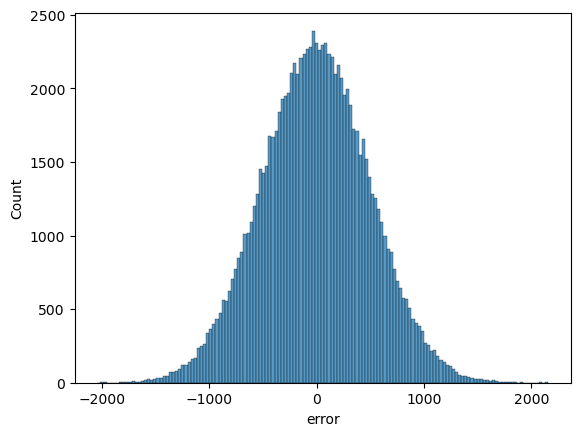

In [11]:
hist_eroare = sns.histplot(data = df, x='error')

# Vizualizarea ipotezelor

### 1. Relatia adevarata e liniara

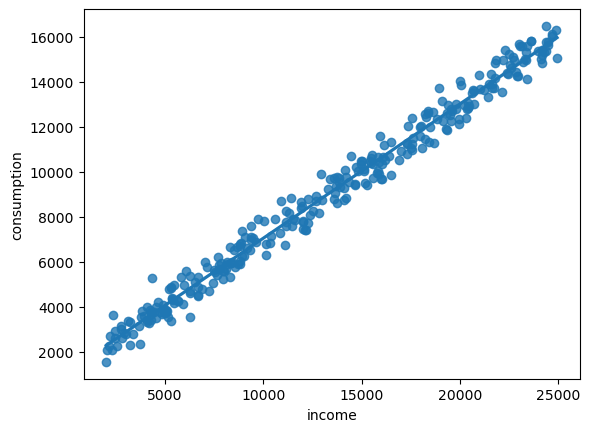

In [12]:
relationship_plot = sns.regplot(data=df.sample(300), x='income',y='consumption')

Se poate observa ca legatura este liniara. Nu sunt pattern-uri de non liniaritate, nici macar local.

### 2. Eroarea conditionata este 0

Teoretic, pentru oricare x presupunem ar trebui sa avem o distributie a erorii 0 si normal distribuite. In datele generate, nu avem multe valori identice pentru x pentru a vedea distributia erorilor pentru fix acel x. De exemplu, nu avem niciun __x=5000__ dar avem 354 valori de __x__ intre 5000 si 5050. 

In [13]:
df[df['consumption'].between(5000,5050)]

,income,consumption,predicted_consumption,error
195,8001.002938,5045.362595,5820.066412,-774.703817
222,6923.754234,5043.692531,5175.647557,-131.955026
1282,5881.486712,5041.568831,4552.154728,489.414103
1779,7664.807762,5047.501407,5618.951749,-571.450342
1822,6112.656869,5030.980706,4690.442578,340.538128
...,...,...,...,...
99345,7722.584813,5020.660796,5653.514446,-632.853650
99366,6499.347747,5010.096003,4921.764177,88.331826
99609,5338.490532,5007.727895,4227.330037,780.397857
99799,4816.723417,5010.823812,3915.204745,1095.619067


Astfel, pentru vizualizare, vom vedea distributia erorii in veciatati. De exemplu, cum arata distrbutia erorilor pentru x intre 5000 si 5050. 

Adaugam label la fiecare observatie cu intervalul lui x. 

In [14]:
#Define the bins and labels
bins = range(2000, 30001, 50)
labels = [f"{i}_{i+50}" for i in range(2000, 30000, 50)]

# Add a new column with the interval labels
df['interval_income'] = pd.cut(df['income'], bins=bins, labels=labels, right=False)

df

,income,consumption,predicted_consumption,error,interval_income
0,12044.094937,8855.943697,8238.676622,617.267074,12000_12050
1,11780.856916,7701.705050,8081.205517,-379.500467,11750_11800
2,17043.645373,10656.947052,11229.447977,-572.500925,17000_17050
3,14714.734118,9430.465192,9836.274499,-405.809307,14700_14750
4,4496.869556,3150.605881,3723.865588,-573.259707,4450_4500
...,...,...,...,...,...
99995,17018.153384,10978.285341,11214.198463,-235.913122,17000_17050
99996,16551.972869,10779.738615,10935.325523,-155.586908,16550_16600
99997,15350.863272,10708.141577,10216.812085,491.329492,15350_15400
99998,19882.076507,13131.143162,12927.420351,203.722811,19850_19900


<Axes: xlabel='error', ylabel='interval'>

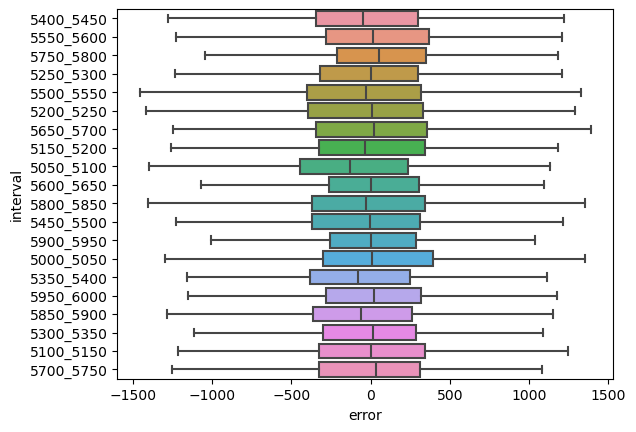

In [15]:
#definim un doar un subset de intervale x pentru care sa vizualizam
df_sample2 = df[df['income'].between(5000,6000)].copy() #pot fi schimbate 5000 si 6000 cu alte valori
df_sample2['interval'] = df_sample2['interval_income'].astype('str')
sns.boxplot(data=df_sample2, y='interval',x='error', showfliers=False)

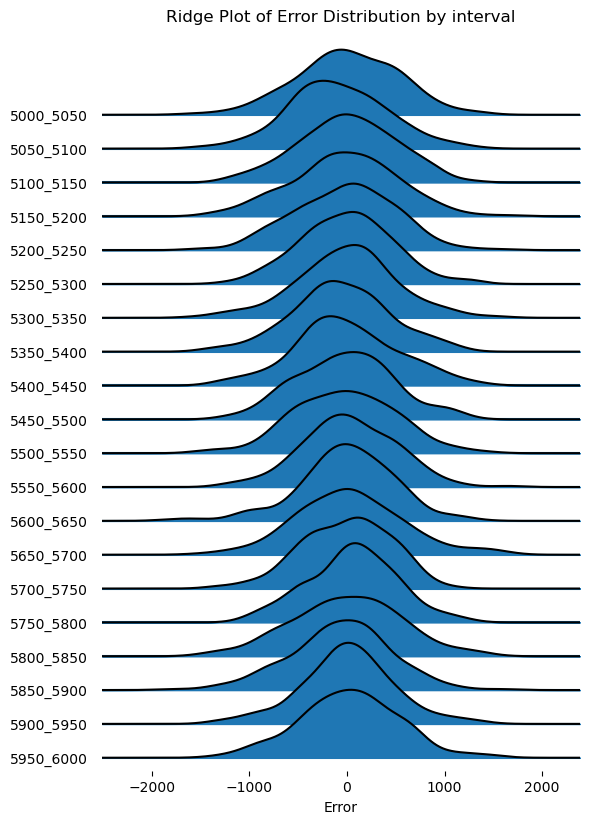

In [16]:
#Create a ridge plot using joypy
fig, axes = joypy.joyplot(df_sample2, by="interval", column="error", figsize=(6, 8))

# Customize the plot if needed
plt.title("Ridge Plot of Error Distribution by interval")
plt.xlabel("Error")
plt.ylabel("Label")
plt.show()

Se poate observa ca distributia erorilor pentru x in intervalele de pe OY tine sa aiba media 0.

# 3. Homoscedasticitatea

Varianta erorilor ar trebui sa fie aceeasi pentru oricare x. Vizualizand graficele de mai sus, se poate observa ca ele tind sa variantele tind sa fie cam la fel. 

# 4. Erorile nu sunt corelate intre ele
Erorile pentru x=i nu sunt corelate cu erorile pentru x=j , pentru oricare i diferit de j. Spre exemplu, eroarea pentru cei care au x (income) 5000 lei nu e influentata de cei care au venit 4999 lei sau oricare alta valoare. 
# 5. Erorile nu sunt corelate cu X



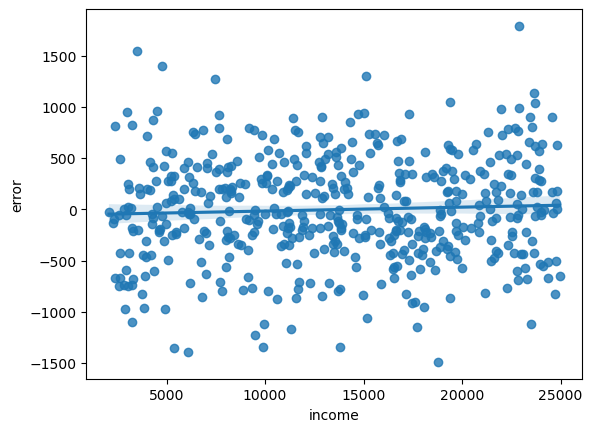

In [17]:
scatter_plot_errors_x = relationship_plot = sns.regplot(data=df.sample(500), x='income',y='error')

Se poate observa erorile lui __x__ nu par a prezice erorile urmatoare. 